<div>
<a href="http://www.music-processing.de/"><img style="float:left;" src="../data/FMP_Teaser_Cover.png" width=40% alt="FMP"></a>
<a href="https://www.audiolabs-erlangen.de"><img src="../data/Logo_AudioLabs_Long.png" width=59% style="float: right;" alt="AudioLabs"></a>
</div>

<div>
<a href="../C4/C4.html"><img src="../data/C4_nav.png" width="100"  style="float:right;" alt="C4"></a>
<h1>Structure Feature</h1> 
</div>

<br/>

<p>
Following Section 4.4.2 of <a href="http://www.music-processing.de/">[Müller, FMP, Springer 2015]</a>, we discuss in this notebook the concept of structure features, which was originally introduced by Serrà et al. in the following articles.

<ul>
<li><span style="color:black">
Joan Serrà, Meinard Müller, Peter Grosche, and Josep Ll. Arcos: <a href="https://www.audiolabs-erlangen.de/fau/professor/mueller/publications/2012_SerraMGA_TimeSeriesStructureFeature_AAAI.pdf"><strong>Unsupervised detection of music boundaries by time series structure features.</strong></a> Proceedings of the AAAI International Conference on Artificial Intelligence, 2012. 
<br>
<a type="button" class="btn btn-default btn-xs" target="_blank" href="../data/bibtex/FMP_bibtex_SerraMGA12_BoundaryDetection_AAAI.txt"> Bibtex </a>
</span></li>
</ul>  
    
<ul>
<li><span style="color:black">
Joan Serrà, Meinard Müller, Peter Grosche, and Josep Ll. Arcos: <a href="https://ieeexplore.ieee.org/document/6763101"><strong>Unsupervised Music Structure Annotation by Time Series Structure Features and Segment Similarity.</strong></a> IEEE Transactions on Multimedia, 16(5): 1229–1240, 2014. 
<br>
<a type="button" class="btn btn-default btn-xs" target="_blank" href="../data/bibtex/FMP_bibtex_SerraMFA14_AudioStructure_IEEE-TMM.txt"> Bibtex </a>
</span></li>
</ul>    
</p> 

## Basic Idea

Most approaches for novelty detection are performed on the basis of features that capture local characteristics of the given music signal. For example, MFCC-based or chroma-based features capture local characteristics related to timbre or harmony, respectively. Then, a measure of novelty is computed by applying a [local kernel](../C4/C4S4_NoveltySegmentation.html) or a type of derivative operator based on such feature representations. Computing local differences based on **localized features** makes such approaches vulnerable to more or less random noise-like fluctuations. We now describe a novelty detection procedure that incorporates **global structural properties** that go beyond local musical aspects such as harmony or timbre. To this end, we introduce **structure features** on the basis of which various structure analysis principles can be integrated within a unifying framework. The idea behind structure features is to jointly consider local and global aspects by measuring for each frame of a given feature sequence the relations to all other frames of the same feature sequence. This yields a frame-wise, i.e., **local** feature representation that captures **global** structural characteristics of a feature sequence. The resulting structure features can then be used in combination with standard novelty detection procedures.

## Time&ndash;Lag Representation

We start by introducing the concept of **time&ndash;lag matrices**, which is the main technical ingredient for defining the structure features. Let $\mathbf{S}$ be a self-similarity matrix derived from a feature sequence $X=(x_1,x_2,\ldots,x_N)$. As detailed in the [FMP notebook on SSMs](../C4/C4S2_SSM.html), two repeating segments, say $\alpha_1=[s_1:t_1]$ and  $\alpha_2=[s_2:t_2]$, are revealed by a path of high similarity in $\mathbf{S}$ starting at $(s_1,s_2)$ and ending at $(t_1,t_2)$. Furthermore, if there is no relative tempo difference between the two segments, then the path runs exactly parallel to the main diagonal. One may also express this property by saying that segment $\alpha_1$ is repeated after some **time lag** corresponding to $\ell=s_2-s_1$ frames. This observation leads us to the notion of a time&ndash;lag representation of an SSM, where one time axis is replaced by a lag axis. To simplify notation, we assume in the following that the frames
are indexed starting with the index $n=0$. Thus, $X=(x_0,x_1,\ldots,x_{N-1})$ and the self-similarity matrix $\mathbf{S}$ is indexed by $[0:N-1]\times[0:N-1]$. The **time&ndash;lag representation** of $\mathbf{S}$ is defined by

\begin{equation}
   \mathrm{L}(\ell,n)=\mathbf{S}(n+\ell,n)  
\end{equation}

for $n\in[0:N-1]$ and $\ell\in[-n:N-1-n]$. Note that the range for the lag parameter $\ell$ depends on the time parameter $n$. The lag index must be chosen in such a way that the sum $n+\ell$ lies in the range $[0:N-1]$. For example, for time index $n=0$ one can only look into the future with $\ell\in[0:N-1]$, whereas for time index $n=N-1$ one can only look into the past with $\ell\in[-N+1:0]$. To simplify notation, we also introduce the **circular time&ndash;lag representation** $\mathrm{L}^{\!\circ}$ by defining

\begin{equation}
   \mathrm{L}^{\!\circ}(\ell,n)=\mathbf{S}\big( (n+\ell) \mod N, n \big)
\end{equation}

for $n\in[0:N-1]$ and $\ell\in[0:N-1]$. 

## Implementation and Examples 

We now illustrate the definitions by considering a [synthetically generated SSM](../C4/C4S2_SSM-Synthetic.html) that corresponds to the musical form $A_1B_1A_2B_2B_3A_3$. The following figure shows the input SSM $\mathbf{S}$, the resulting time&ndash;lag representation $\mathrm{L}$, as well as the circular version $\mathrm{L}^{\!\circ}$. Note that the representation $\mathrm{L}$ is obtained by shearing the original matrix $\mathbf{S}$ parallel to the horizontal axis. As a result, lines that are parallel to the main diagonal in $\mathbf{S}$ become horizontal lines in $\mathrm{L}$. In other words, diagonal structures are transformed into horizontal structures. In the circular version, a negative lag parameter $\ell\in[-n:-1]$ as used in $\mathrm{L}$ 
is identified with $\ell+N$ in $\mathrm{L}^{\!\circ}$. Doing so, the time&ndash;lag representation $\mathrm{L}^{\!\circ}$ again becomes a matrix indexed by $[0:N-1]\times[0:N-1]$ as for the matrix $\mathbf{S}$.

<!--<img src="../data/C4/FMP_C4_F26.png" width="600px" align="middle" alt="FMP_C4_F26">-->

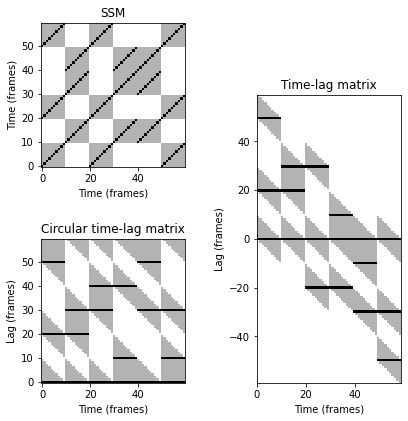

In [1]:
import numpy as np
import os, sys, librosa
from scipy import signal
from scipy import ndimage
from matplotlib import pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
import IPython.display as ipd
import pandas as pd
from numba import jit

sys.path.append('..')
import libfmp.b
import libfmp.c2
import libfmp.c3
import libfmp.c4
%matplotlib inline

def compute_time_lag_representation(S, circular=True):
    """Computation of (circular) time-lag representation

    Notebook: C4/C4S4_StructureFeature.ipynb

    Args:
        S (np.ndarray): Self-similarity matrix
        circular (bool): Computes circular version (Default value = True)

    Returns:
        L (np.ndarray): (Circular) time-lag representation of S
    """
    N = S.shape[0]
    if circular:
        L = np.zeros((N, N))
        for n in range(N):
            L[:, n] = np.roll(S[:, n], -n)
    else:
        L = np.zeros((2*N-1, N))
        for n in range(N):
            L[((N-1)-n):((2*N)-1-n), n] = S[:, n]
    return L

ann = [[0, 9, 'A'], [10, 19, 'B'], [20, 29, 'A'], [30, 39, 'B'], [40, 49, 'B'], [50, 59, 'A']]
S = libfmp.c4.generate_ssm_from_annotation(ann, score_path=1, score_block=0.3)
N = S.shape[0]
L = compute_time_lag_representation(S, circular=False)
L_circ = compute_time_lag_representation(S, circular=True)

plt.figure(figsize=(5, 5))

ax1 = plt.axes([0, 0.6, 0.4, 0.4]) 
ax2 = plt.axes([0, 0, 0.4, 0.4])
ax3 = plt.axes([0.6, 0.0, 0.4, 0.8]) 

fig, ax, im = libfmp.b.plot_matrix(S, ax=[ax1], title='SSM', 
                                   xlabel='Time (frames)', ylabel='Time (frames)', colorbar=None)

fig, ax, im = libfmp.b.plot_matrix(L_circ, ax=[ax2], title='Circular time-lag matrix', 
                                   xlabel='Time (frames)', ylabel='Lag (frames)', colorbar=None)

fig, ax, im = libfmp.b.plot_matrix(L, ax=[ax3], extent=[0, N-1, -(N-1), N-1], title='Time-lag matrix', 
                                   xlabel='Time (frames)', ylabel='Lag (frames)', colorbar=None)

Following Exercise 4.13b of <a href="http://www.music-processing.de/">[Müller, FMP, Springer 2015]</a>, we consider a musical piece with structure $AB_1B_2$, where the $A$-part and $B_1$-part segments have the same length and the $B_2$-part segment has twice the length (played with half the tempo of $B_1$). Note that path structures in $\mathbf{S}$ that are **not** parallel to the main diagonal become hard to interpret in the resulting circular time&ndash;lag representation $\mathrm{L}^{\!\circ}$.

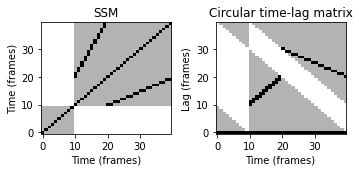

In [2]:
ann = [[0, 9, 'A'], [10, 19, 'B'], [20, 39, 'B']]
S = libfmp.c4.generate_ssm_from_annotation(ann, score_path=1, score_block=0.3)
N = S.shape[0]
L = compute_time_lag_representation(S, circular=False)
L_circ = compute_time_lag_representation(S, circular=True)

plt.figure(figsize=(5, 2.5))
ax = plt.subplot(121)
fig, ax, im = libfmp.b.plot_matrix(S, ax=[ax], title='SSM', 
                                   xlabel='Time (frames)', ylabel='Time (frames)', colorbar=None)
ax = plt.subplot(122)
fig, ax, im = libfmp.b.plot_matrix(L_circ, ax=[ax], title='Circular time-lag matrix', 
                                   xlabel='Time (frames)', ylabel='Lag (frames)', colorbar=None)
plt.tight_layout()

## Structure Features and Novelty Function

What have we gained by considering a time&ndash;lag representation of a self-similarity matrix? In the following, let $\mathbf{S}^{[n]}$ denote the $n^{\mathrm{th}}$ column of $\mathbf{S}$ for a given time frame $n\in[0:N-1]$. Recall that the vector $\mathbf{S}^{[n]}\in\mathbb{R}^N$ reveals the kind of relations that exist for time frame $n$. In the case that $\mathbf{S}^{[n]}(m)$ is large for some $m\in[0:N-1]$, then time frame $n$ is related to time frame $m$. In the case that the value is small, the two frames are unrelated. In other words, $\mathbf{S}^{[n]}$ reveals the global structural relations of frame $n$. The same interpretation holds for the $n^{\mathrm{th}}$ column of the time&ndash;lag matrix ${\mathrm{L}^{\!\circ}}^{[n]}$. However, there is a crucial difference between $\mathbf{S}$ and $\mathrm{L}^{\!\circ}$. In the case that two subsequent frames $n$ and $n+1$ have the same structural properties, the two vectors $\mathbf{S}^{[n]}$ and $\mathbf{S}^{[n+1]}$ are **cyclically shifted** versions of each other, whereas the two vectors ${\mathrm{L}^{\!\circ}}^{[n]}$ and ${\mathrm{L}^{\!\circ}}^{[n+1]}$
are **identical**.

Based on this observation, we define the **structure features** to be the columns $y_n:={\mathrm{L}^{\!\circ}}^{[n]}\in\mathbb{R}^N$ for $\mathrm{L}^{\!\circ}$, $n\in[0:N-1]$. By this process, we have converted the original sequence $X=(x_0,x_1,\ldots,x_{N-1})$ of features $x_n$ that capture local (acoustic, musical) characteristics into a sequence $Y=(y_0,y_1,\ldots,y_{N-1})$ of features $y_n$ that capture global (structural) characteristics. As a result, boundaries of the global structural parts can be identified by looking for local changes in the feature sequence $Y$. There are many ways to capture such local changes. A simple strategy is to compute the difference between successive structure features based on a suitable distance function. For example, using the Euclidean norm of $\mathbb{R}^N$, one obtains a **novelty function**

$$
   \Delta_\mathrm{Structure}(n) := \| y_{n+1}-y_n \|= \|{\mathrm{L}^{\!\circ}}^{[n+1]}-{\mathrm{L}^{\!\circ}}^{[n]}\|
$$

for $n\in[0:N-2]$. Again, by zero-padding one may assume $n\in[0:N-1]$. The positions of local maxima or peaks of this function yield candidates for structural boundaries. The overall procedure depends on many design choices and parameter settings including the feature type used for the original sequence $X$ or the way $\mathbf{S}$ is computed. Also, in practice, one often uses more involved derivative operators and applies suitable preprocessing steps (e.g., further enhancing the matrix $\mathrm{L}^{\!\circ}$) and postprocessing steps (e.g., normalizing the novelty function $\Delta_\mathrm{Structure}$). Finally, the peak selection strategy may have a crucial influence on the final result. 

## Implementation and Examples

In the following code cell, we provide an implementation for computing the novelty function based on structure features. The result is shown for the synthetic example $A_1B_1A_2B_2B_3A_3$ introduced above. Note that, for this example, the peak positions of the resulting novelty function coincide with the (joint) start and end positions of path components, which in turn concur with boundaries of the musical sections.

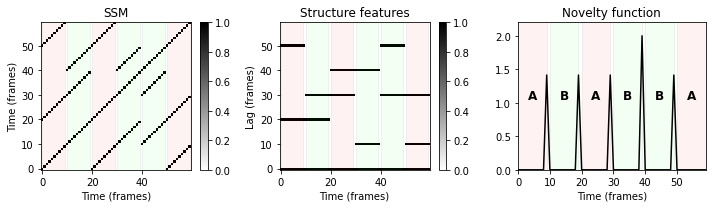

In [3]:
def novelty_structure_feature(L, padding=True):
    """Computation of the novelty function from a circular time-lag representation

    Notebook: C4/C4S4_StructureFeature.ipynb

    Args:
        L (np.ndarray): Circular time-lag representation
        padding (bool): Padding the result with the value zero (Default value = True)

    Returns:
        nov (np.ndarray): Novelty function
    """
    N = L.shape[0]
    if padding:
        nov = np.zeros(N)
    else:
        nov = np.zeros(N-1)
    for n in range(N-1):
        nov[n] = np.linalg.norm(L[:, n+1] - L[:, n])
    return nov

def plot_ssm_structure_feature_nov(S, L, nov, Fs=1, figsize=(10, 3), ann=[], color_ann=[]):
    """Plotting an SSM, structure features, and a novelty function

    Notebook: C4/C4S4_StructureFeature.ipynb

    Args:
        S: SSM
        L: Circular time-lag representation
        nov: Novelty function
        Fs: Feature rate (indicated in title of SSM) (Default value = 1)
        figsize: Figure size (Default value = (10, 3))
        ann: Annotations (Default value = [])
        color_ann: Colors used for annotations (see :func:`libfmp.b.b_plot.plot_segments`) (Default value = [])

    Returns:
        ax1: First subplot
        ax2: Second subplot
        ax3: Third subplot
    """
    plt.figure(figsize=figsize)
    ax1 = plt.subplot(131)
    if Fs == 1:
        title = 'SSM'
    else:
        title = 'SSM (Fs = %d)' % Fs
    fig_im, ax_im, im = libfmp.b.plot_matrix(S, ax=[ax1], title=title,
                                             xlabel='Time (frames)', ylabel='Time (frames)')
    if ann:
        libfmp.b.plot_segments_overlay(ann, ax=ax_im[0], edgecolor='k',
                                       print_labels=False, colors=color_ann, alpha=0.05)

    ax2 = plt.subplot(132)
    fig_im, ax_im, im = libfmp.b.plot_matrix(L, ax=[ax2], title='Structure features',
                                             xlabel='Time (frames)', ylabel='Lag (frames)', colorbar=True)
    if ann:
        libfmp.b.plot_segments_overlay(ann, ax=ax_im[0], edgecolor='k', ylim=False,
                                       print_labels=False, colors=color_ann, alpha=0.05)

    ax3 = plt.subplot(133)
    fig, ax, im = libfmp.b.plot_signal(nov, ax=ax3, title='Novelty function',
                                       xlabel='Time (frames)', color='k')
    if ann:
        libfmp.b.plot_segments_overlay(ann, ax=ax, edgecolor='k', colors=color_ann, alpha=0.05)
    plt.tight_layout()
    return ax1, ax2, ax3

color_ann = {'A': [1, 0, 0, 0.2], 'B': [0, 1, 0, 0.2], 'C': [0, 0, 1, 0.2], '': [1, 1, 1, 0.2]}
ann = [[0, 9, 'A'], [10, 19, 'B'], [20, 29, 'A'], [30, 39, 'B'], [40, 49, 'B'], [50, 59, 'A']]
S = libfmp.c4.generate_ssm_from_annotation(ann, score_path=1, score_block=0)
L = compute_time_lag_representation(S, circular=True)
nov = novelty_structure_feature(L)
ax = plot_ssm_structure_feature_nov(S, L, nov, ann=ann, color_ann=color_ann)

The structure features work particularly well in this example because of two reasons. First, there are many repeating parts, resulting in a rich path structure. Second, the two repeating musical parts occur in different chronological orders, resulting in characteristic path discontinuations that are captured well by the structure features. That is, structure-based novelty detection does not work for a piece with musical structure $A_1A_2A_3A_4$ or $A_1B_1A_2B_2$, but works well for a piece with musical structure $A_1B_1A_2A_3$ or $A_1A_2B_1B_2$. This fact is illustrated by the following figure.

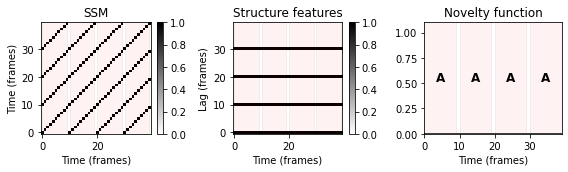

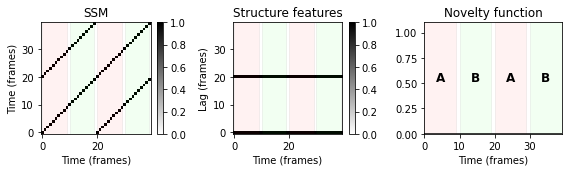

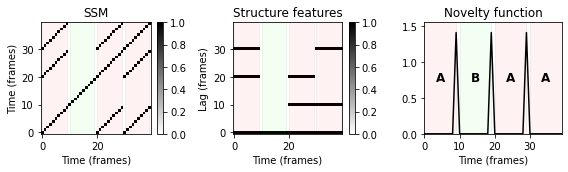

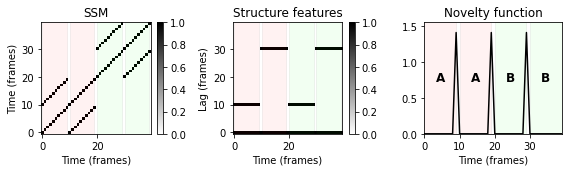

In [4]:
color_ann = {'A': [1, 0, 0, 0.2], 'B': [0, 1, 0, 0.2], 'C': [0, 0, 1, 0.2], '': [1, 1, 1, 0.2]}
figsize = (8,2.5)

ann_set = [[[0, 9, 'A'], [10, 19, 'A'], [20, 29, 'A'], [30, 39, 'A']],
       [[0, 9, 'A'], [10, 19, 'B'], [20, 29, 'A'], [30, 39, 'B']],
       [[0, 9, 'A'], [10, 19, 'B'], [20, 29, 'A'], [30, 39, 'A']],
       [[0, 9, 'A'], [10, 19, 'A'], [20, 29, 'B'], [30, 39, 'B']]]

for ann in ann_set:
    S = libfmp.c4.generate_ssm_from_annotation(ann, score_path=1, score_block=0)
    L = compute_time_lag_representation(S, circular=True)
    nov = novelty_structure_feature(L)
    ax = plot_ssm_structure_feature_nov(S, L, nov, figsize=figsize, ann=ann, color_ann=color_ann)

## Example: Chopin

To illustrate the overall procedure for structure-based novelty detection, we look at a recording of the  Prelude Op.28, No. 11 by Frédéric Chopin, which has the musical structure $A_1A_2BA_3A_4CD$. The following figure shows (a path-enhanced and thresholded) SSM computed from a chroma-based feature representation. Furthermore, the figures shows the time&ndash;lag matrix $\mathrm{L}^{\!\circ}$ and the resulting novelty function $\Delta_\mathrm{Structure}$. Since the recording and the segments are rather short, we use in the following a relatively high feature rate. 

<audio style="width: 320px;" src="../data/C4/FMP_C4_Audio_Chopin_Op028-11_003_20100611-SMD.mp3" type="audio/mpeg" controls="controls"></audio>

<!--<img src="../data/C4/FMP_C4_F27.png" width="600px" align="middle" alt="FMP_C4_F27">-->

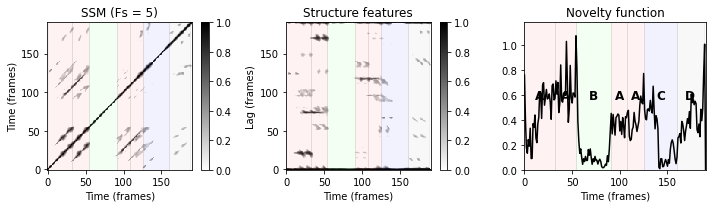

In [5]:
fn_wav = os.path.join('..', 'data', 'C4', 'FMP_C4_Audio_Chopin_Op028-11_003_20100611-SMD.wav')
fn_ann = os.path.join('..', 'data', 'C4', 'FMP_C4_Audio_Chopin_Op028-11_003_20100611-SMD.csv')
x, x_duration, X, Fs_feature, S, I = libfmp.c4.compute_sm_from_filename(fn_wav, L=9, H=2, L_smooth=11, thresh= 0.1)

ann_frames, color_ann = libfmp.c4.read_structure_annotation(fn_ann, Fs=Fs_feature, remove_digits=True, index=True)
color_ann = {'A': [1, 0, 0, 0.2], 'B': [0, 1, 0, 0.2], 'C': [0, 0, 1, 0.2], '': [1, 1, 1, 0.2]}

L = compute_time_lag_representation(S, circular=True)
nov = novelty_structure_feature(L)
ax = plot_ssm_structure_feature_nov(S, L, nov, Fs=Fs_feature, ann=ann_frames, color_ann=color_ann)

The result is not yet very convincing. In particular, the novelty curve looks quite noise. Only some of the segments boundaries (e.g., from $A_2$ to $B$ or from $A_4$ to $C$) are indicated well by peak positions. There are many parameters (such as the feature representation or the temporal resolution) that may have a significant influence on the final result. We discussed such issues already in the [FMP notebook on novelty-based segmentation](../C4/C4S4_NoveltySegmentation.html). In this specific example, the structure features defined by $\mathrm{L}^{\!\circ}$ are noisy and contain many small fragments that corrupt the final novelty function. A good method for removing such outliers and suppressing some noise is to apply a [**median filter**](../C8/C8S1_HPS.html) in horizontal direction. Furthermore, to make the differentiation in the novelty computation less vulnerable to small deviations, one may further smooth the time&ndash;lag matrix by applying a **convolution** with a **Gaussian kernel**. The effect of these two post-processing strategies are illustrated by the following figures.

Application of median filter


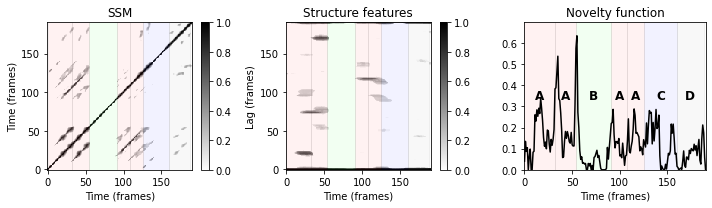

Application of convolution filter


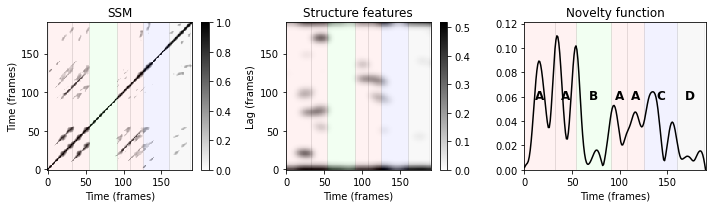

In [6]:
print('Application of median filter')
L_filter = ndimage.median_filter(L, (3,11))
nov = novelty_structure_feature(L_filter)
ax = plot_ssm_structure_feature_nov(S, L_filter, nov, ann=ann_frames, color_ann=color_ann)
plt.show()

print('Application of convolution filter')
L_filter = ndimage.gaussian_filter(L_filter, 4)
nov = novelty_structure_feature(L_filter)
ax = plot_ssm_structure_feature_nov(S, L_filter, nov, ann=ann_frames, color_ann=color_ann)

## Example:  Brahms 


We close this notebook by having a looked at our [Brahms example](../C4/C4S1_MusicStructureGeneral.html) from previous notebooks, which is the Ormandy recording of the Hungarian Dance No. 5 having the musical form $A_1A_2B_1B_2CA_3B_3B_4D$. Note that, due to relative tempo differences between the $B$-part segments, this example is problematic when using a time&ndash;lag representation. This is also shown in the following result. 

<audio style="width: 320px;" src="../data/C4/FMP_C4_Audio_Brahms_HungarianDances-05_Ormandy.mp3" type="audio/mpeg" controls="controls"></audio>

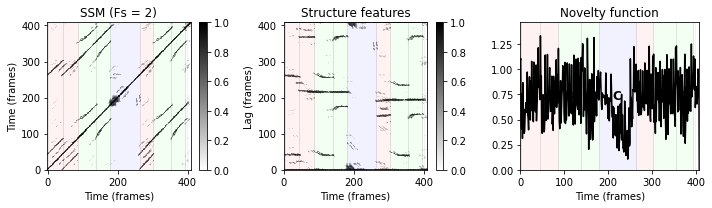

In [7]:
filename = 'FMP_C4_Audio_Brahms_HungarianDances-05_Ormandy.csv'
fn_ann = os.path.join('..', 'data', 'C4', filename)
fn_wav = os.path.join('..', 'data', 'C4', 'FMP_C4_Audio_Brahms_HungarianDances-05_Ormandy.wav')
tempo_rel_set = np.array([0.8, 1, 1.25])
x, x_duration, X, Fs_feature, S, I = libfmp.c4.compute_sm_from_filename(fn_wav, L=21, H=5, 
                                    L_smooth=11, tempo_rel_set=tempo_rel_set, thresh= 0.1)

ann_frames, color_ann = libfmp.c4.read_structure_annotation(fn_ann, fn_ann_color=filename, 
                                                            Fs=Fs_feature, remove_digits=True, index=True)

L = compute_time_lag_representation(S, circular=True)
nov = novelty_structure_feature(L)
ax = plot_ssm_structure_feature_nov(S, L, nov, Fs=Fs_feature, ann=ann_frames, color_ann=color_ann)

The problems of the novelty function are partly because of the noisy path relations already visible in the input SSM and partly because of the non-diagonal path structures due to relative tempo differences. Again, applying some postprocessing (median filtering, convolution with a Gaussian kernel) before computing the novelty functions alleviates some of the issues.

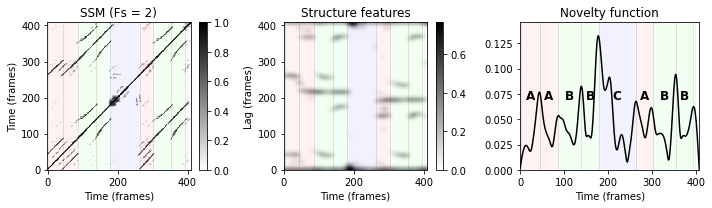

In [8]:
L_filter = ndimage.median_filter(L, (3,21))
L_filter = ndimage.gaussian_filter(L_filter, 6)
nov = novelty_structure_feature(L_filter)
ax = plot_ssm_structure_feature_nov(S, L_filter, nov, Fs=Fs_feature, ann=ann_frames, color_ann=color_ann)

## Further Notes

In summary, the main conceptual idea of the novelty-based segmentation approach introduced in this notebook is that it integrates different structure analysis principles within a unifying framework: the structure features capture (global) repetition-based information, which is then analyzed using a (local) novelty-based procedure. The following points are important in practice:

* The quality of the input SSM is of crucial importance for obtaining a meaningful novelty function. Postprocessing the time&ndash;lag matrix by applying smoothing techniques (median, convolution) is an important step for increasing the robustness of the overall procedure.

* Tuning parameters of the procedure (e.g., feature resolution, SSM parameters, SSM threshold, filter parameters) in a musically informed way (e.g., expected minimum length of segments, duration of music recording) may substantially improve the final results.  

<div class="alert" style="background-color:#F5F5F5; border-color:#C8C8C8">
<strong>Acknowledgment:</strong> This notebook was created by <a href="https://www.audiolabs-erlangen.de/fau/professor/mueller">Meinard Müller</a> and Tim Zunner.
</div> 

<table style="border:none">
<tr style="border:none">
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C0/C0.html"><img src="../data/C0_nav.png" style="height:50px" alt="C0"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C1/C1.html"><img src="../data/C1_nav.png" style="height:50px" alt="C1"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C2/C2.html"><img src="../data/C2_nav.png" style="height:50px" alt="C2"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C3/C3.html"><img src="../data/C3_nav.png" style="height:50px" alt="C3"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C4/C4.html"><img src="../data/C4_nav.png" style="height:50px" alt="C4"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C5/C5.html"><img src="../data/C5_nav.png" style="height:50px" alt="C5"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C6/C6.html"><img src="../data/C6_nav.png" style="height:50px" alt="C6"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C7/C7.html"><img src="../data/C7_nav.png" style="height:50px" alt="C7"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C8/C8.html"><img src="../data/C8_nav.png" style="height:50px" alt="C8"></a></td>
</tr>
</table>